<a href="https://colab.research.google.com/github/ChinarVyas/Evaluation-Projects/blob/main/Phase%3AII/Temperature_Forecast_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature Forecast Project using ML Project Description This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information: For more information, read [Cho et al, 2020].

station - used weather station number: 1 to 25
Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
lat - Latitude (Â°): 37.456 to 37.645
lon - Longitude (Â°): 126.826 to 127.135
DEM - Elevation (m): 12.4 to 212.3
Slope - Slope (Â°): 0.1 to 5.2
Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from time import time
import plotly.express as px
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
tempfp=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/temperature.csv')

In [3]:
tempfp

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
tempfp.dtypes.value_counts()

float64    24
object      1
dtype: int64

In [5]:
tempfp.shape

(7752, 25)

In [6]:
tempfp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

after data was uploaded in the notebook we observed there are 7752 rows × 25 columns with 1 object dtype that is date which we need to convert to date time, we also see a huge number of null values that needs to be taken care of checking some unique values belowcolumnwise to understand the duplicacy. we have 2 columns to be predicted "Next_Tmax" & "Next_Tmin"....

In [7]:
for i in tempfp.columns:
    print(tempfp[i].value_counts())
    print('\n')

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
        

In [8]:
tempfp=tempfp.drop_duplicates()

In [9]:
tempfp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

plotting the present temp max & min

In [10]:
fig = px.line(tempfp,x = 'Date', y = ['Present_Tmax', 'Present_Tmin',], template = 'plotly_dark', title = 'Variation of Temperature with Time')
fig.show();

plotting the present humidity max and min

In [11]:
fig = px.line(tempfp,x = 'Date', y = ['LDAPS_RHmax', 'LDAPS_RHmin'], template = 'plotly_dark', title = 'Variation of Humidity with Time')
fig.show();

plotting the cloud max and min cover

In [12]:
fig = px.line(tempfp,x = 'Date', y = ['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4'], template = 'plotly_dark', title = 'Variation of Cloud Cover with Time')
fig.show();

plotting the Precipitation over time

In [13]:
fig = px.line(tempfp,x = 'Date', y = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'], template = 'plotly_dark', title = 'Variation of Precipitation with Time')
fig.show()

In [14]:
fig = px.line(tempfp,x = 'Date', y ='Solar radiation', template = 'plotly_dark', title = 'Solar radiation')
fig.show();

<Axes: xlabel='Solar radiation', ylabel='Next_Tmin'>

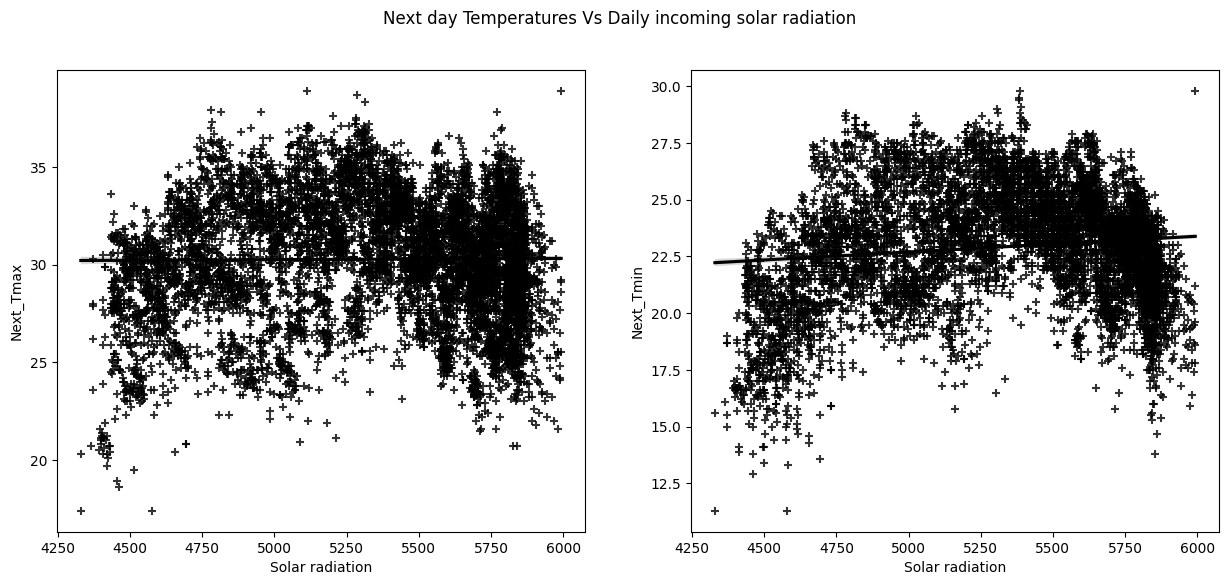

In [15]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Daily incoming solar radiation')

plt.subplot(1,2,1)
sns.regplot(x='Solar radiation',y='Next_Tmax',data=tempfp,marker='+',color='k')

plt.subplot(1,2,2)
sns.regplot(x='Solar radiation',y='Next_Tmin',data=tempfp,marker='+',color='k')

Solar radiation does not seem to affect Tmax or Tmin even though studies have shown that Air temperatures have their origin in the absorption of radiant energy from the Sun.

converting the date to datetime format

In [16]:
tempfp['Date']=pd.to_datetime(tempfp['Date'])

In [17]:
tempfp.reset_index()

index  station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         0      1.0 2013-06-30          28.7          21.4    58.255688   
1         1      2.0 2013-06-30          31.9          21.6    52.263397   
2         2      3.0 2013-06-30          31.6          23.3    48.690479   
3         3      4.0 2013-06-30          32.0          23.4    58.239788   
4         4      5.0 2013-06-30          31.4          21.9    56.174095   
...     ...      ...        ...           ...           ...          ...   
7747   7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748   7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749   7749     25.0 2017-08-30          23.2          17.4    22.933014   
7750   7750      NaN        NaT          20.0          11.3    19.794666   
7751   7751      NaN        NaT          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS  ...  \
0       91.116364         28.074101         23.006936   6.818887  ...   
1       90.604721         29.850689         24.035009   5.691890  ...   
2       83.973587         30.091292         24.565633   6.138224  ...   
3       96.483688         29.704629         23.326177   5.650050  ...   
4       90.155128         29.113934         23.486480   5.735004  ...   
...           ...               ...               ...        ...  ...   
7747    78.869858         26.352081         18.775678   6.148918  ...   
7748    77.294975         27.010193         18.733519   6.542819  ...   
7749    77.243744         27.939516         18.522965   7.289264  ...   
7750    58.936283         17.624954         14.272646   2.882580  ...   
7751   100.000153         38.542255         29.619342  21.857621  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0       0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1       0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2       0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3       0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4       0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...          ...         ...         ...      ...      ...       ...   
7747    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 26 columns]

In [18]:
tempfp.index=tempfp['Date']

In [19]:
tempf=tempfp.iloc[:-2]

In [20]:
tempf.index

DatetimeIndex(['2013-06-30', '2013-06-30', '2013-06-30', '2013-06-30',
               '2013-06-30', '2013-06-30', '2013-06-30', '2013-06-30',
               '2013-06-30', '2013-06-30',
               ...
               '2017-08-30', '2017-08-30', '2017-08-30', '2017-08-30',
               '2017-08-30', '2017-08-30', '2017-08-30', '2017-08-30',
               '2017-08-30', '2017-08-30'],
              dtype='datetime64[ns]', name='Date', length=7750, freq=None)

In [21]:
tempf.index.year.value_counts().sort_index()

2013    1550
2014    1550
2015    1550
2016    1550
2017    1550
Name: Date, dtype: int64

In [22]:
tempf.index.month.value_counts().sort_index()

1      250
2      250
3      250
4      250
5      250
6      375
7     2625
8     2500
9      250
10     250
11     250
12     250
Name: Date, dtype: int64

decided to drop last 2 rows as all the dates sumed up to 25 per stations that the last 2 rows had station and date missing so chose to drop them

In [23]:
tempf.drop(columns=['Date'], inplace= True)

In [24]:
tempf.replace(" ", "")

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7750 rows x 24 columns]

we will now work on missing values not using the mean method to fill the NAN values mean or median will not give us ideal situation to move forward with predecting as for weather we are aware that the temperature is always near to or same as the pervious day in most of the cases.

In [25]:
tempf=tempf.ffill()

In [26]:
tempf.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

working on outlier and skewness

In [27]:
from scipy.stats import zscore

In [28]:
#creating a function to choose right threshold
def threhold(z,d):
    for i in np.arange(3,5,0.3):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [29]:
z=np.abs(zscore(tempf))
threhold(z,tempf)

With threshold 3.0 data loss is 11.33%
With threshold 3.3 data loss is 9.07%
With threshold 3.6 data loss is 7.96%
With threshold 3.9 data loss is 6.84%
With threshold 4.2 data loss is 6.13%
With threshold 4.5 data loss is 4.9%
With threshold 4.8 data loss is 4.34%


will use threshold 4.8  as the data loss is minimal compared to other threshold which is  4.34%

In [30]:
tempf=tempf[(z<4.2).all(axis=1)]

In [31]:
tempf.skew()

station             0.000801
Present_Tmax       -0.308306
Present_Tmin       -0.355662
LDAPS_RHmin         0.320783
LDAPS_RHmax        -0.792418
LDAPS_Tmax_lapse   -0.210840
LDAPS_Tmin_lapse   -0.562595
LDAPS_WS            1.297970
LDAPS_LH            0.633766
LDAPS_CC1           0.521491
LDAPS_CC2           0.487675
LDAPS_CC3           0.693543
LDAPS_CC4           0.695777
LDAPS_PPT1          3.907309
LDAPS_PPT2          4.649550
LDAPS_PPT3          5.623952
LDAPS_PPT4          6.183329
lat                 0.091677
lon                -0.277290
DEM                 1.736636
Slope               1.580214
Solar radiation    -0.518059
Next_Tmax          -0.324667
Next_Tmin          -0.395931
dtype: float64

In [32]:
skew=('LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1','DEM','Slope','LDAPS_WS')
for col in skew :
    if tempf.skew().loc[col]>0.55:
        tempf[col]=np.log1p(tempf[col])

In [33]:
tempf.skew()

station             0.000801
Present_Tmax       -0.308306
Present_Tmin       -0.355662
LDAPS_RHmin         0.320783
LDAPS_RHmax        -0.792418
LDAPS_Tmax_lapse   -0.210840
LDAPS_Tmin_lapse   -0.562595
LDAPS_WS            0.590545
LDAPS_LH            0.633766
LDAPS_CC1           0.521491
LDAPS_CC2           0.487675
LDAPS_CC3           0.693543
LDAPS_CC4           0.695777
LDAPS_PPT1          2.628510
LDAPS_PPT2          3.417825
LDAPS_PPT3          4.088480
LDAPS_PPT4          4.494757
lat                 0.091677
lon                -0.277290
DEM                 0.447367
Slope               0.844034
Solar radiation    -0.518059
Next_Tmax          -0.324667
Next_Tmin          -0.395931
dtype: float64

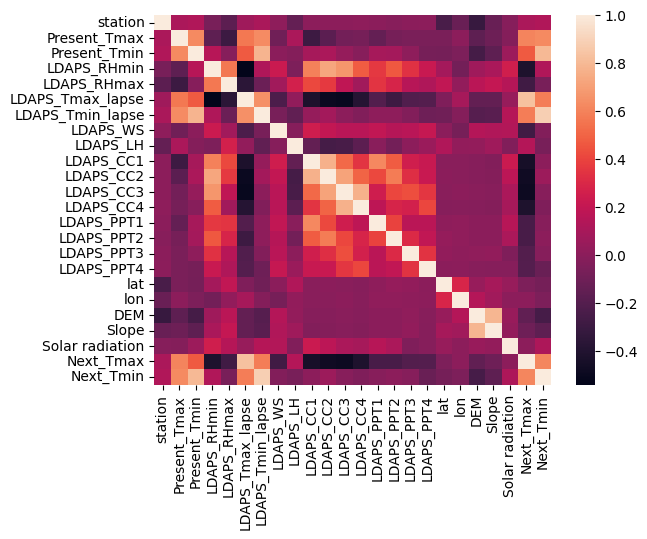

In [34]:
sns.heatmap(tempf.corr());

In [35]:
fig = px.box(tempf, y=['Present_Tmax', 'Present_Tmin',
       'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3',
       'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',])
fig.show();

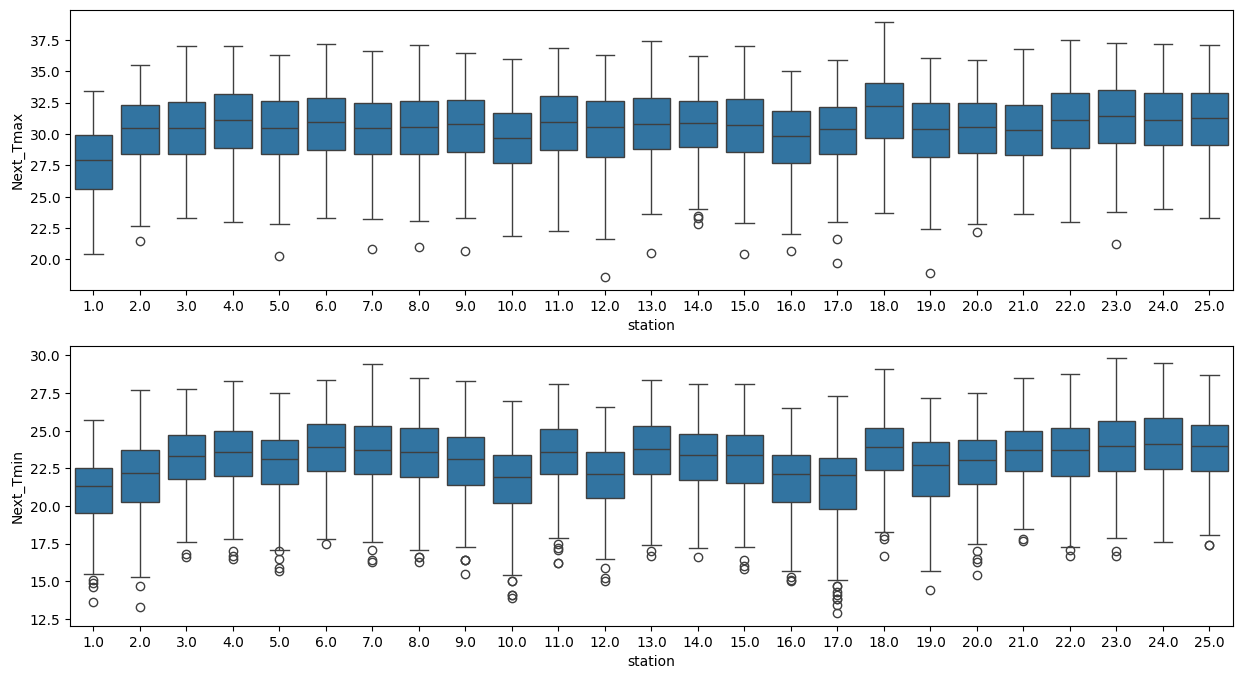

In [36]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=tempf);
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=tempf);

Station 18 observes highest temperature for both Tmax and Tmin while station 1 observes lowest temperatures for both. It coud be because of their location

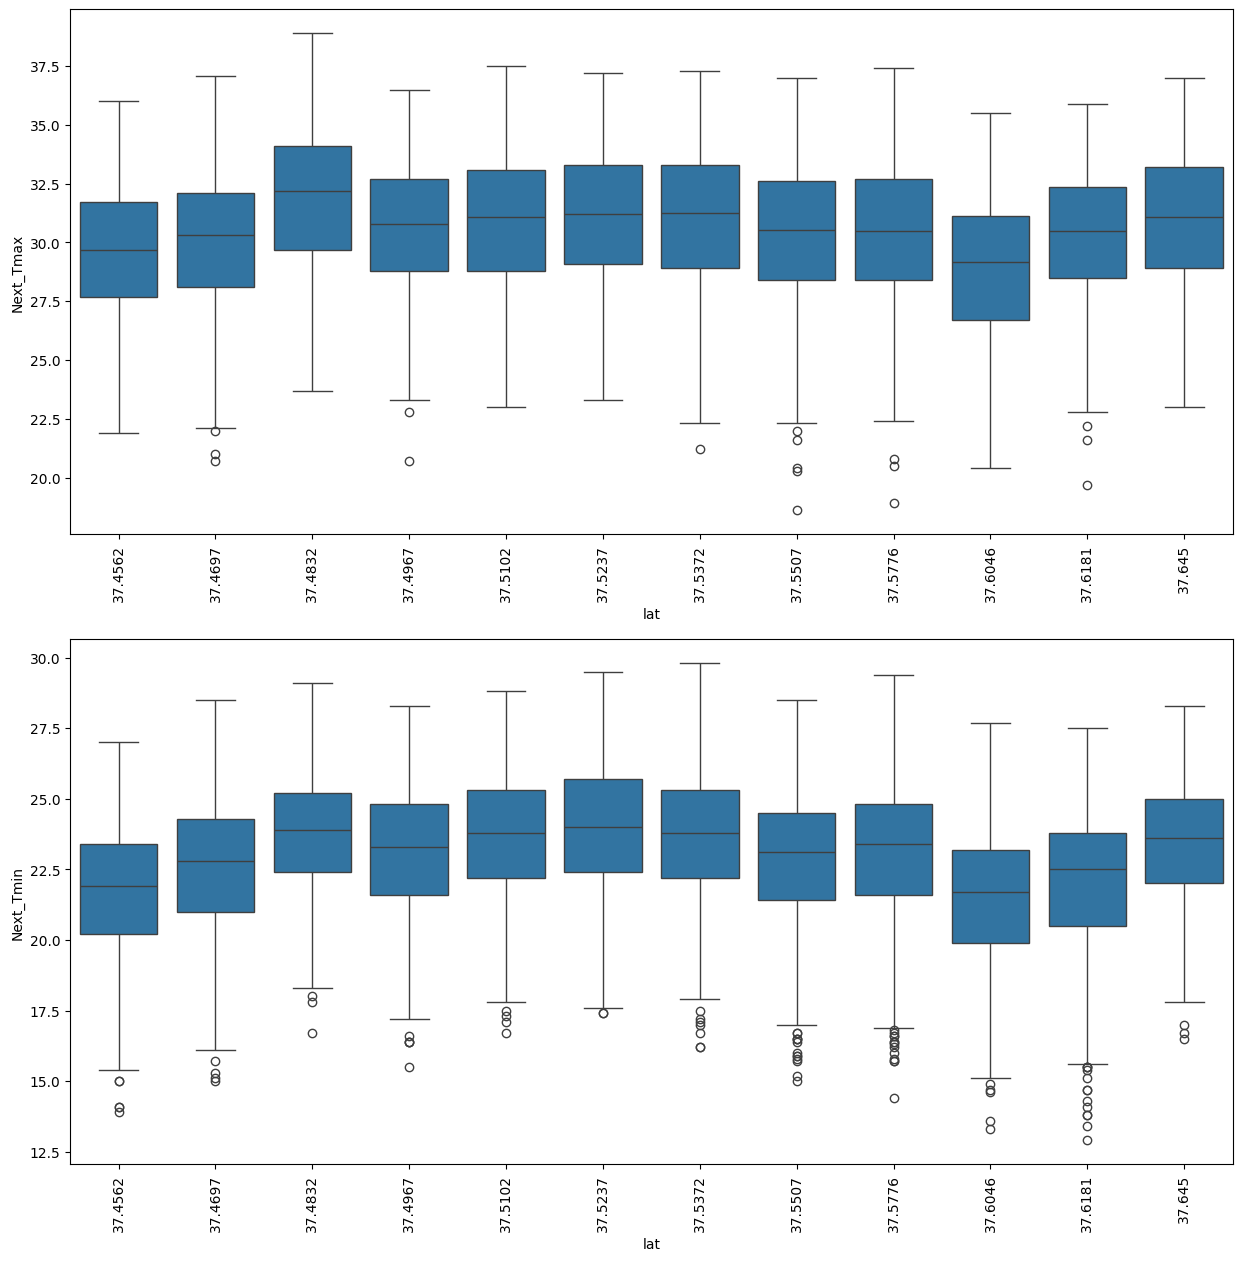

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=tempf)
plt.xticks(rotation=90);

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=tempf)
plt.xticks(rotation=90);

Temperature seems to fall as the the latitude increases which is also a know fact.

after treating skewness and outliers will scale the data and mve to train and test the data

will work on predicting Max temp followed by min temp

In [38]:
x=tempf.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=tempf['Next_Tmax']
ymin=tempf['Next_Tmin']

In [39]:
scaler= StandardScaler()
ss=scaler.fit_transform(x)
x=pd.DataFrame(ss,columns=x.columns)

Training the data with ymax

In [40]:

models=[SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]

names=['SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [41]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]

    xtrain,xtest,ytrain,ytest=train_test_split(x,ymax,test_size=0.25,random_state=42)
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)


        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)


    data=pd.DataFrame()
    data['Model']=name
    data['MAE']=meanabs
    data['MSE']=meansqd
    data['RMSE']=rootmeansqd
    data['R2_Score']=r2
    data['Mean_CV_Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [42]:
createmodels(models,x,ymax,names)

MAE     MSE    RMSE  R2_Score  Mean_CV_Score
Model                                                                     
SVR                        0.8145  1.1919  1.0918      84.0           66.0
LinearRegression           1.1106  2.0703  1.4389      71.0           70.0
Lasso                      1.5877  3.9293  1.9822     -66.0           53.0
Ridge                      1.1106  2.0702  1.4388      71.0           70.0
DecisionTreeRegressor      1.0515  2.1940  1.4812      77.0           41.0
RandomForestRegressor      0.7549  1.0142  1.0071      87.0           68.0
AdaBoostRegressor          1.2366  2.3447  1.5312      61.0           66.0
GradientBoostingRegressor  0.9262  1.4190  1.1912      81.0           70.0
XGBRegressor               0.7034  0.8381  0.9155      90.0           67.0

SVR,RFR,GBR,XGB are the models showing good results

*   Training the data with ymin




In [43]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]

    xtrain,xtest,ytrain,ytest=train_test_split(x,ymin,test_size=0.25,random_state=42)

    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)


        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)


    data=pd.DataFrame()
    data['Model']=name
    data['MAE']=meanabs
    data['MSE']=meansqd
    data['RMSE']=rootmeansqd
    data['R2_Score']=r2
    data['Mean_CV_Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [44]:
createmodels(models,x,ymin,names)

MAE     MSE    RMSE  R2_Score  Mean_CV_Score
Model                                                                     
SVR                        0.5963  0.6066  0.7788      88.0           74.0
LinearRegression           0.8010  1.0347  1.0172      80.0           79.0
Lasso                      1.2144  2.3823  1.5435     -67.0           57.0
Ridge                      0.8010  1.0347  1.0172      80.0           79.0
DecisionTreeRegressor      0.8844  1.4163  1.1901      77.0           58.0
RandomForestRegressor      0.5963  0.6099  0.7809      88.0           79.0
AdaBoostRegressor          0.8846  1.1944  1.0929      75.0           75.0
GradientBoostingRegressor  0.6567  0.7022  0.8380      87.0           80.0
XGBRegressor               0.5073  0.4482  0.6695      92.0           77.0

SVR,RFR,GBR,XGB are the models showing good results here too...

# Hyperparameter Tuning


In [45]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Random Forest

In [47]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [48]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [49]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
0.8917643411969504


In [50]:
m=RandomForestRegressor(max_depth= None, min_samples_leaf=1, min_samples_split=2,n_estimators=500)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [51]:
score=cross_val_score(m,x,ymax,cv=10)

In [52]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7657
Mean Squared Error is 1.0421
Root Mean Squared Error is 1.0209
R2 Score is 86.42
Mean of cross validaton Score is 64.0936


Graidient Boost


In [53]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [54]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [55]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=5, n_estimators=500, subsample=0.5)
0.9222994638593198


In [88]:
gbr=GradientBoostingRegressor(max_depth=5, n_estimators=500, subsample=0.5)
gbr.fit(xtrain_max,ytrain_max)
p3=gbr.predict(xtest_max)

In [89]:
score=cross_val_score(gbr,x,ymax,cv=10)

In [90]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p3,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p3,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p3,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p3,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6438
Mean Squared Error is 0.72
Root Mean Squared Error is 0.8485
R2 Score is 91.58
Mean of cross validaton Score is 63.4338


XGBoost

In [59]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [60]:
g=RandomizedSearchCV(xgb.XGBRegressor(verbosity=0),params,cv=10,n_jobs=-2)
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-2,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 10],
                                        'learning_rate': [0.001, 0.05, 0.1],
                                        'max_depth': [5, 6, 8, 10, 12, 15, 20,
                                                      25, 30],
                                        'min_child_weight': [1, 3, 5, 10]})

In [61]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
{'min_child_weight': 10, 'max_depth': 20, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
0.9169264011330774


In [85]:
xmax=xgb.XGBRegressor(colsample_bytree=0.7,gamma=0.3,learning_rate=0.05,max_depth=20, min_child_weight=10)
xmax.fit(xtrain_max,ytrain_max)
p1=xmax.predict(xtest_max)

In [86]:
score=cross_val_score(xmax,x,ymax,cv=10)

In [87]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p1,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p1,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p1,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p1,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6621
Mean Squared Error is 0.7844
Root Mean Squared Error is 0.8857
R2 Score is 89.91
Mean of cross validaton Score is 64.9072


For Next day Minimun Temperature

Random Forest

In [74]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(x,ymin,test_size=0.25,random_state=42)

In [75]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [77]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [78]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': None}
RandomForestRegressor(min_samples_split=3, n_estimators=500)
0.9009641101305951


In [91]:
m=RandomForestRegressor(n_estimators= 500, min_samples_split= 3, min_samples_leaf= 1, max_depth= None)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [92]:
score=cross_val_score(m,x,ymin,cv=10)

In [93]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.5965
Mean Squared Error is 0.6102
Root Mean Squared Error is 0.7812
R2 Score is 88.29
Mean of cross validaton Score is 74.2453


Graidient Boost

In [79]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [80]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10,n_jobs=-2)
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-2,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [81]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=6, n_estimators=500, subsample=0.5)
0.9365212736404555


In [94]:
gbr1=GradientBoostingRegressor(max_depth=6, n_estimators=500, subsample=0.5)
gbr1.fit(xtrain_min,ytrain_min)
p4=gbr1.predict(xtest_min)

In [95]:
score=cross_val_score(gbr1,x,ymin,cv=10)

In [96]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p4,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p4,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p4,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p4,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4765
Mean Squared Error is 0.3969
Root Mean Squared Error is 0.63
R2 Score is 92.99
Mean of cross validaton Score is 74.0116


XGBoost

In [82]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [83]:
g=RandomizedSearchCV(xgb.XGBRegressor(verbosity=0),params,cv=10,n_jobs=-2)
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-2,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 10],
                                        'learning_rate': [0.001, 0.05, 0.1],
                                        'max_depth': [5, 6, 8, 10, 12, 15, 20,
                                                      25, 30],
                                        'min_child_weight': [1, 3, 5, 10]})

In [84]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
{'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.4}
0.9210508599965452


In [97]:
xmin=xgb.XGBRegressor(colsample_bytree=0.4,gamma=0.2,learning_rate=0.1,max_depth=6, min_child_weight=10)
xmin.fit(xtrain_min,ytrain_min)
p2=xmin.predict(xtest_min)

In [98]:
score=cross_val_score(xmin,x,ymin,cv=10)

In [99]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p2,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p2,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p2,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p2,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.5369
Mean Squared Error is 0.4777
Root Mean Squared Error is 0.6912
R2 Score is 91.07
Mean of cross validaton Score is 74.731


**Evaluation Metrics**

* **XGboost**   



In [100]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p1,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p1,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p1,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p1,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6621
Mean Squared Error is 0.7844
Root Mean Squared Error is 0.8857
R2 Score is 89.91
Mean of cross validaton Score is 74.731


In [101]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p2,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p2,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p2,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p2,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.5369
Mean Squared Error is 0.4777
Root Mean Squared Error is 0.6912
R2 Score is 91.07
Mean of cross validaton Score is 74.731




*  **Gradient Boost**




In [102]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p3,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p3,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p3,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p3,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6438
Mean Squared Error is 0.72
Root Mean Squared Error is 0.8485
R2 Score is 91.58
Mean of cross validaton Score is 74.731


In [103]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p4,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p4,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p4,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p4,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4765
Mean Squared Error is 0.3969
Root Mean Squared Error is 0.63
R2 Score is 92.99
Mean of cross validaton Score is 74.731


**As gradient is showing good results we will proceed with that model**

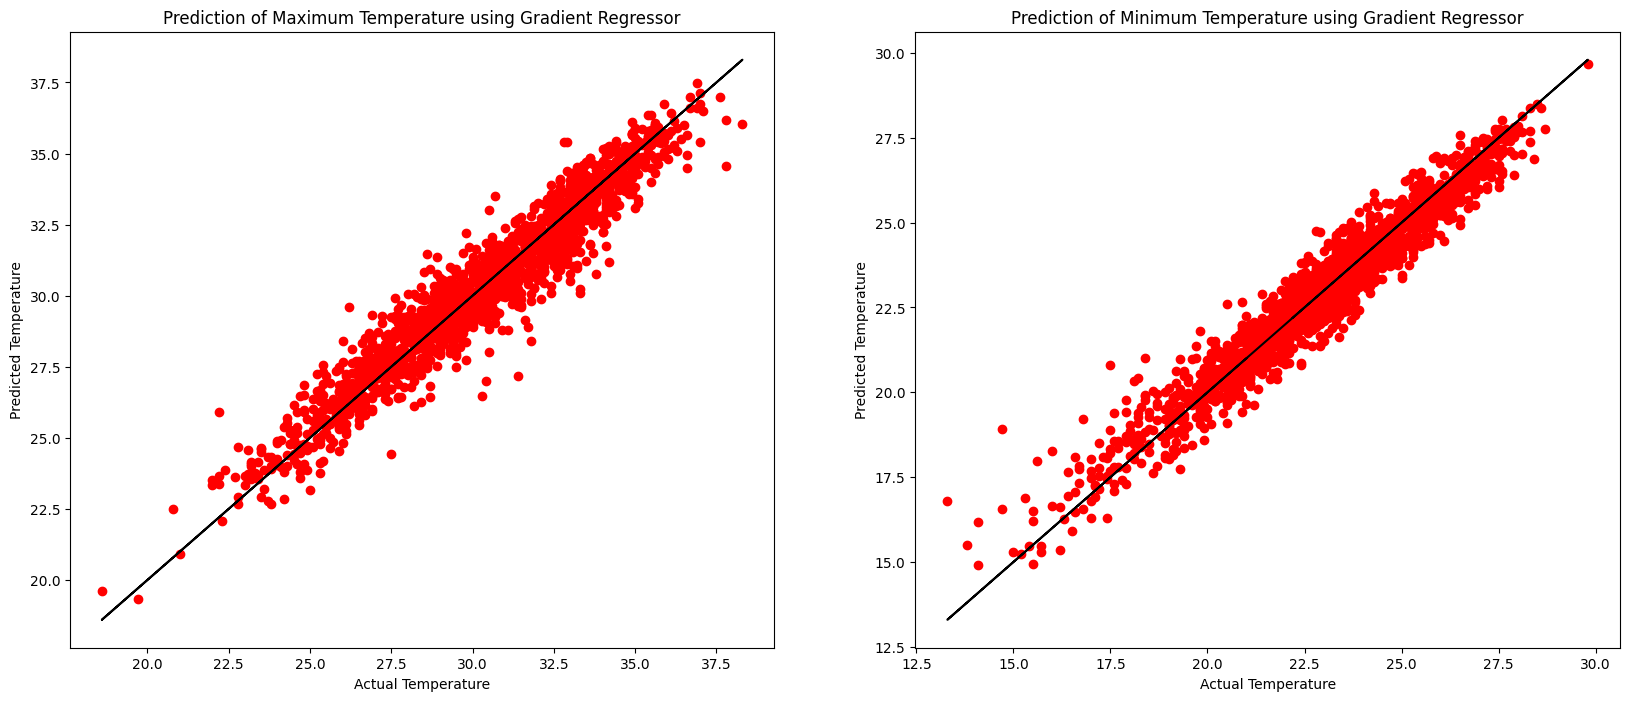

In [104]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x=ytest_max,y=p3,color='r')
plt.plot(ytest_max,ytest_max,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Maximum Temperature using Gradient Regressor');
plt.subplot(1,2,2)
plt.scatter(x=ytest_min,y=p4,color='r')
plt.plot(ytest_min,ytest_min,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Minimum Temperature using Gradient Regressor');

In [105]:
import joblib
joblib.dump(gbr,'T_max.pkl')

['T_max.pkl']

In [106]:
import joblib
joblib.dump(gbr1,'T_min.pkl')

['T_min.pkl']